# Перевірка гіпотез про розподіл.

# Задачі з методички КНУ. с. 40-41. 

## 1.  Критерій Колмогорова 

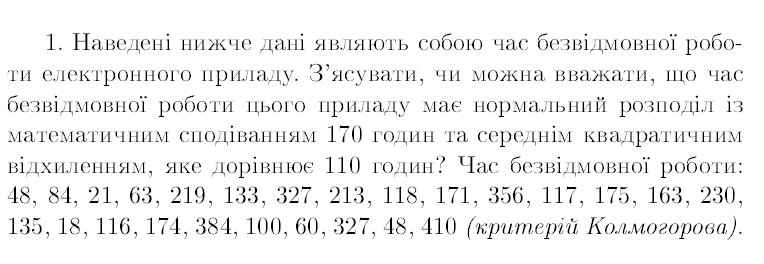
(умова трохи дивна, перевіримо гіпотезу про розподіл  $N(170, 110)$.
### Розв'язок.  

Задамо нашу вибірку: 

In [114]:
import numpy as np
from math import sqrt
from scipy.special import kolmogi
import scipy.stats as ss
import scipy


In [115]:
x = [48, 84, 63, 291, 133, 327, 213, 171, 356, 117, 175, 163, 230, 135, 18, 116, 174, 384, 100, 60, 327, 48, 410] 

In [119]:
print(len(x))

23


Задамо функцію функцію розподілу $N(170, 110)$:
$$
F(x) = \int_{-\infty}^x \frac{e^{- (y-170)^2/(2* 110)}}{\sqrt{2\pi 110}}dy. 
$$
$F(x)= \Phi_{0,1} \left(\frac{x-170}{\sqrt{110}}\right)$:

In [116]:
y = ss.norm.cdf(x, 170, np.sqrt(110))
y

array([1.41285766e-31, 1.20415414e-16, 9.70657754e-25, 1.00000000e+00,
       2.09505150e-04, 1.00000000e+00, 9.99979333e-01, 5.37980100e-01,
       1.00000000e+00, 2.17061686e-07, 6.83223262e-01, 2.52250730e-01,
       9.99999995e-01, 4.23258381e-04, 6.74376299e-48, 1.31150415e-07,
       6.48541218e-01, 1.00000000e+00, 1.24259907e-11, 4.89953692e-26,
       1.00000000e+00, 1.41285766e-31, 1.00000000e+00])

Обчислимо статистику Колмогорова
$$
\hat{\kappa}_n = \sqrt{n} \sup_x | \hat{F}_n(x) - F(x)|. 
$$

$$
\hat{F}_n(x) =\sum_{k=1}^n \frac{k}{n} 1_{\xi_{(k)}\leq x}. 
$$

In [117]:
maximum = 0
k = 0
x.sort()
for a in y:
    M = max(abs(a - k/len(x)), abs(a- (k+1)/len(x)))
    k += 1
    if M > maximum:
        maximum = M
    else:
        continue

kappa = sqrt(len(x)) * maximum
kappa

4.587317109255644

Обчислимо квантіль рівня 1-0.05 розподілу Колмогорова. Для цього треба завантажити функцію kolmogi

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kolmogi.html

In [118]:
# from scipy.special import kolmogi
scipy.special.kolmogi(0.05)

1.3580986393225507

In [113]:
scipy.special.kolmogi(0.95)

0.5196103791686225

Отже, гіпотезу треба відхилити. 

Обчислимо за допомогою вбудованої функції: 
$$
\hat{\kappa}_n = \sqrt{\frac{n^2}{2n}} \sup_x | \hat{F}_n(x) - \hat{G}_n(x)|. 
$$

Ми використаємо для цього функцію kstest.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [65]:
r = ss.norm.rvs(170, np.sqrt(110), size = len(x))
KS = ss.kstest(x,r) 
print(KS)

KstestResult(statistic=0.4782608695652174, pvalue=0.00945186008028569)


Окремо: 

In [69]:
KS.statistic 

0.4782608695652174

In [70]:
KS.pvalue

0.00945186008028569

Отже, гіпотезу  $H_0$: розподіл  $N(170, 10)$, відхиляємо. 

 Насправді   KS.statistic рахує 
 $$
 \sup_x | \hat{F}_n(x) - \hat{G}_n(x)|, 
 $$
 (і окремо генерує вибірку!), тому значення різні 

Інші альтернативні гіпотези: 
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html


alternative{‘two-sided’, ‘less’, ‘greater’}, optional

In [108]:
KS_less = ss.kstest(x,r, alternative = "less") 
KS_less

KstestResult(statistic=0.34782608695652173, pvalue=0.06215377009592806)

In [109]:
KS_greater = ss.kstest(x,r, alternative = "greater") 
KS_greater

KstestResult(statistic=0.4782608695652174, pvalue=0.004725930045729824)

Що це означає на рівні гіпотез?  $\Delta>0$. 

less: 

$H_1: $ $G(y) = F(y-\Delta)$, $\eta \sim \xi+\Delta$, $\xi$ зсунута вліво. 



greater: 

$H_1: $ $G(y) = F(y+\Delta)$, $\eta \sim \xi-\Delta$, $\xi$ зсунута вправо. 


Перевіримо гіпотезу: $H_0$: $X\sim N(200, 110)$, $H_1$: less

In [121]:
r2 = ss.norm.rvs(200, np.sqrt(110), size = len(x))

In [125]:
KS_X = ss.kstest(x,r2, alternative = "less") 
print(KS_X)

KstestResult(statistic=0.30434782608695654, pvalue=0.12042292956086062)


$H_0$ приймаємо, альтернатива не виконується, $x$ зсунута вліво вілносто $r2$.

In [124]:
KS_X = ss.kstest(r2,x, alternative = "less") 
print(KS_X)

KstestResult(statistic=0.6521739130434783, pvalue=3.169186984537375e-05)


## 2. Критерій Вілкоксона. 

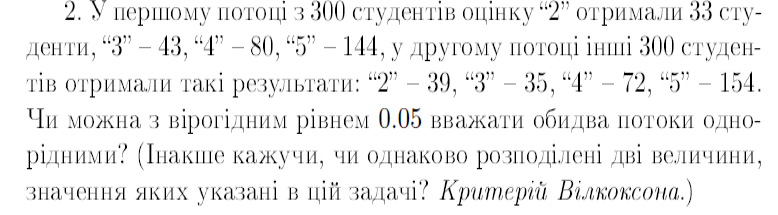

In [79]:
X1 = np.repeat(np.array([2,3,4,5]), [33,43,80,144])
X2 = np.repeat(np.array([2,3,4,5]), [39,35,72,154])

Застосуємо критерій Вілкоксона для виборок однакового розміру. Статистика: 
$$
W = \sum_{i=1}^N sign(X_{2i}-X_{1i})R_i, 
$$
де $R_i$ - ранк $|X_{2i}-X_{1i}|$. Розподіл $W$ табульований. 

In [80]:
ss.wilcoxon(X1, X2)

WilcoxonResult(statistic=57.0, pvalue=0.15729920705028502)

Отримане 57.0 --це значення  $W$. 

Альтернатива: less, greater. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html 

Можна також зробити тест як для виборок з різним розміром (це тест Манна-Уітні  U- test 
https://www.google.com/search?q=mann+whitney+u+test+by+hands+python&oq=mann+whitney+u+test+by+hands+python&aqs=chrome..69i57.3000j0j9&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:6a36c6ca,vid:QX6EiTHyMVs

Це як раз та сума рангів 
$$
S_{nm} = \sum_{i=1}^n \nu_i
$$
--сума рангів першої вибірки в загальній. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [35]:
from scipy.stats import mannwhitneyu
mannwhitneyu(X1, X2)

MannwhitneyuResult(statistic=43985.0, pvalue=0.6057984199486688)

В обох випадках бачимо, що гіпотезу про однаковий розподіл треба прийняти. 

Як написати "красиво":

In [77]:
# perform mann whitney test
stat, p_value = mannwhitneyu(X1, X2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=43985.00, p=0.61
Do not Reject Null Hypothesis (No significant difference between two samples)


In [83]:
n = len(X1)
n

300

In [85]:
n*(n+1)/2

45150.0

Те значення, яке обчислює функція  mannwhitneyu-- це навправді  
$$
S_{nm}- \frac{n(n+1)}{2}. 
$$
Далі обчислимо: 

In [91]:
Snm = 89135

In [93]:
W  = Snm -   n*(n+1)/2
W

43985.0

Інша функція: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

In [94]:
scipy.stats.ranksums(X1,X2)

RanksumsResult(statistic=-0.4780773566665686, pvalue=0.6325951477134615)

Як рахувати ранги? 

In [38]:
scipy.stats.rankdata(X1, method='average')

array([ 17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,
        17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,
        17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  17. ,
        17. ,  17. ,  17. ,  17. ,  17. ,  17. ,  55. ,  55. ,  55. ,
        55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,
        55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,
        55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,
        55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,  55. ,
        55. ,  55. ,  55. ,  55. , 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5, 116.5,
       116.5, 116.5,

In [39]:
X = np.array([X1,X2])
Rank = scipy.stats.rankdata(X, method='average')
Rank

array([ 36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,
        36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,
        36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,  36.5,
        36.5,  36.5,  36.5,  36.5,  36.5,  36.5, 111.5, 111.5, 111.5,
       111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5,
       111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5,
       111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5,
       111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5, 111.5,
       111.5, 111.5, 111.5, 111.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5, 226.5,
       226.5, 226.5,

Рахуємо тепер суму рангів $X1$ в $X$. 

In [40]:
n1 = 300
U1 = 33*36.5+ 43*111.5+ 80*226.5 + 144* 451.5 -  n1* (n1 + 1) / 2
U1

43985.0

Це те хначення, яке дає тест Манна-Уітні. Знайдемо двосторонню критичну область.
$$
x_{mn}(\alpha, \pm) = \frac{n(m+n+1)}{2} \pm x_\alpha \sqrt{mn(m+n+1)/12}, 
$$
де $x_\alpha$ --квантіль $N(0,1)$ рівня  $1-\alpha$.
Тоді критична область- $R\backslash [x_{mn}(\alpha,-),x_{mn}(\alpha,+)]$. 

In [103]:
Snm = 33*36.5+ 43*111.5+ 80*226.5 + 144* 451.5
n2 = 300
alpha = 0.05
x_alpha2 = ss.norm.ppf(1-alpha/2)
x_mn1 = n1*(n1+n2+1)/2 - x_alpha2 * np.sqrt(n1*n2*(n1+n2+1)/12)
x_mn2 = n1*(n1+n2+1)/2 + x_alpha2 * np.sqrt(n1*n2*(n1+n2+1)/12)
print(Snm)
print([x_mn1,x_mn2])

89135.0
[85988.82520983812, 94311.17479016188]


In [42]:
if x_mn1< W  and W < x_mn2 :
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')


Accept Null Hypothesis


Альтернатива:  less, greater. 
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

## 3. Критерій Спірмена. 



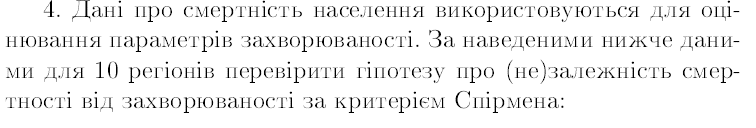

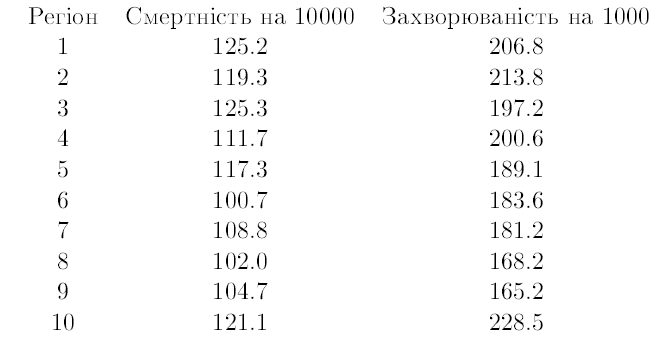

In [44]:
X= [125.2, 119.3, 125.3, 111.7, 117.3, 100.7, 108.8, 102.0, 104.7, 121.1]
Y= [206.8, 213.8, 197.2, 200.6, 189.1, 183.6, 181.2, 168.2, 165.2, 228.5]

Порахуємо коефіцієнт Спірмена: 
$$
\hat{\rho}_n = 1- \frac{6}{n(n^2-1)}  \sum_{k=1}^n (\nu_k - \tau_k)^2. 
$$

In [45]:
n = len(X)
R1 = scipy.stats.rankdata(X, method='average')
R2 = scipy.stats.rankdata(Y, method='average')
rho = 1- 6 /(n*(n**2 -1)) * np.sum((R1-R2)**2)
rho

0.7333333333333334

Критична область: $D:= \{ \rho:\, |\rho|> r_\alpha\}$, $r_\alpha = x_{\alpha/2} / \sqrt{n-1}$,  де  $x_{\alpha/2}$ - квантіль рівня  $1-\alpha/2$  нормального розподілу $N(0,1)$. 

In [46]:
x_alpha2 = ss.norm.ppf(1-0.025)
x_alpha2

1.959963984540054

In [47]:
r_alpha = x_alpha2 / np.sqrt(n-1)
r_alpha

0.653321328180018

Отже, ми попали в критичну область, відхиляємо нульову гіпотезу. 
Перевіримо це вбудованою функцією: 

In [49]:
ss.spearmanr(X,Y)

SpearmanrResult(correlation=0.7333333333333332, pvalue=0.01580059625057158)

Альтернатива: 
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html